# PRINCIPLE COMPONENT ANALYSIS

In [38]:
import numpy as np 
import pandas as pd 
import sympy as sp
import matplotlib.pyplot as plt

In [39]:
dataset = { 
    'x1': [2.5, 0.5, 2.2, 1.9 ,3.1, 2.3, 2.0, 1.0 ,1.5, 1.1],
    'x2': [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]
}
df = pd.DataFrame(dataset)

**Step 1: Standardize the Dataset**

In [40]:
mean = np.mean(df, axis=0)
df = df - mean
df

,x1,x2
0,0.69,0.49
1,-1.31,-1.21
2,0.39,0.99
3,0.09,0.29
4,1.29,1.09
5,0.49,0.79
6,0.19,-0.31
7,-0.81,-0.81
8,-0.31,-0.31
9,-0.71,-1.01


**Step 2: Find the Covariance Matrix**

$$ C = \frac{ X \cdot X^T}{N - 1} $$


where, X is the Dataset Matrix (In this numerical, it is a 10 X 2 matrix) 
is the transpose of the X (In this numerical, it is a 2 X 10 matrix) and N
 is the number of elements = 1

In [41]:
c= np.dot(df.T,df)/9
c

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

**Step 3: Find the EigenValues**
$$|C - I| = 0$$

In [42]:
λ = np.linalg.eig(c)[0]

#λ  =sp.Matrix(λ)
λ1 = λ [0]
λ2 = λ [1]

print("λ1 = ",λ1)
print("λ2 = ",λ2)

λ1 =  0.04908339893832736
λ2 =  1.2840277121727839


*Sum of eigenvalues (λ1) and (λ2) = 1.28403 + 0.0490834 = 1.33 =  Total
 Variance {Majority of variance comes from }*

In [43]:
total_var = np.sum(λ)
total_var

np.float64(1.3331111111111111)

**Step 3 : find the eigenvectors from the eigenvalues**

*we will find the eigenvectors for the eigenvalue 1.28403 by using
 the equation C⋅X=λ⋅X*

In [44]:
def find_eigenvector(correlation_matrix, eigenvalue):
    try:
        a, b = correlation_matrix[0, 0], correlation_matrix[0, 1]
        c, d = correlation_matrix[1, 0], correlation_matrix[1, 1]

        # Solve for the relationship between x and y
        if abs(a - eigenvalue) < 1e-10: #check to prevent divide by 0 errors.
            y = 1
            x = 0
        else:
            y = 1
            x = (b) / (eigenvalue - a) * y

        # Create the initial eigenvector
        eigenvector = np.array([x, y])

        # Normalize the eigenvector
        magnitude = np.linalg.norm(eigenvector)
        normalized_eigenvector = eigenvector / magnitude

        return normalized_eigenvector

    except Exception as e:
        print(f"Error calculating eigenvector: {e}")
        return None
    

print(find_eigenvector(c, λ1))    
print(find_eigenvector(c, λ2))

# second method
#eigenvalues, eigenvectors = np.linalg.eig(c)

[-0.73517866  0.6778734 ]
[0.6778734  0.73517866]


**Step 4 : Multiply with principle component**

*principle component is the eigen vector with high eigenvalue*

In [45]:
principle_Component = find_eigenvector(c, λ2)
reduce_data = np.dot(df, principle_Component)
reduce_data

array([ 0.82797019, -1.77758033,  0.99219749,  0.27421042,  1.67580142,
        0.9129491 , -0.09910944, -1.14457216, -0.43804614, -1.22382056])

# second method with the plot

Explained Variance Ratio: [0.96318131 0.03681869]
Principal Components:
 [[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]
Transformed Data:
 [[-0.82797019 -0.17511531]
 [ 1.77758033  0.14285723]
 [-0.99219749  0.38437499]
 [-0.27421042  0.13041721]
 [-1.67580142 -0.20949846]
 [-0.9129491   0.17528244]
 [ 0.09910944 -0.3498247 ]
 [ 1.14457216  0.04641726]
 [ 0.43804614  0.01776463]
 [ 1.22382056 -0.16267529]]


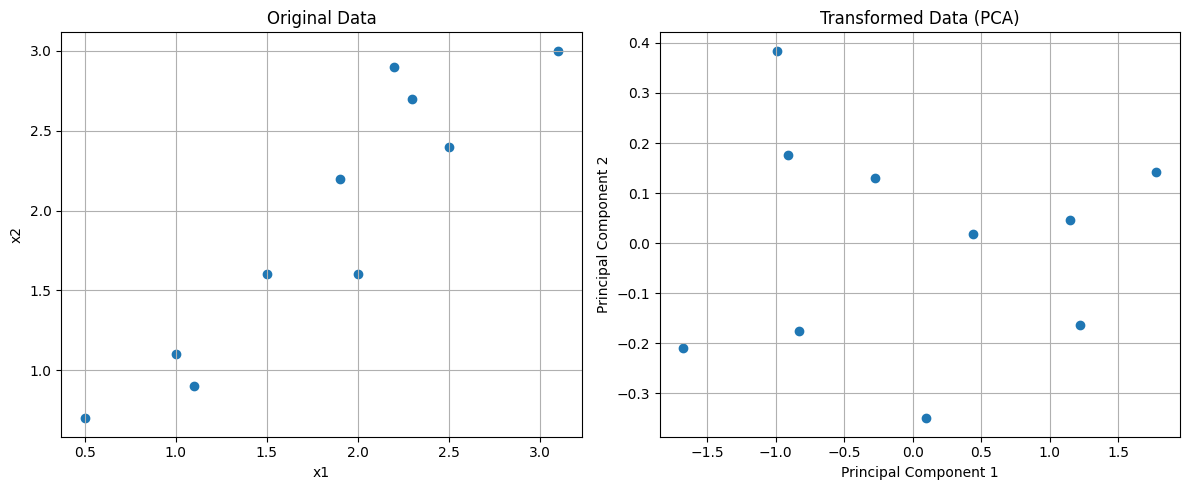

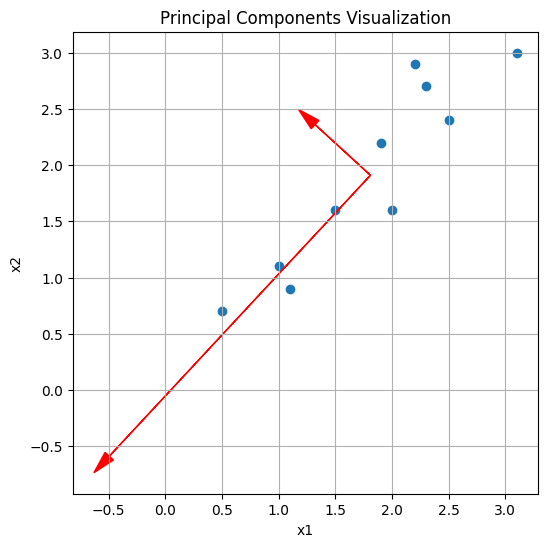

In [47]:
# Dataset
x1 = np.array([2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1])
x2 = np.array([2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9])

# Combine into a single data matrix
data = np.array([x1, x2]).T

# Center the data
mean = np.mean(data, axis=0)
centered_data = data - mean

# Calculate the covariance matrix
covariance_matrix = np.cov(centered_data.T)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Explained variance ratio
total_variance = np.sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance
print("Explained Variance Ratio:", explained_variance_ratio)

# Principal components
principal_components = sorted_eigenvectors
print("Principal Components:\n", principal_components)

# Transform the data to the principal component space
transformed_data = np.dot(centered_data, principal_components)
print("Transformed Data:\n", transformed_data)

# Visualize the original and transformed data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Original Data")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Transformed Data (PCA)")
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize the principal components as vectors on the original data
plt.figure(figsize=(6, 6))
plt.scatter(x1, x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Principal Components Visualization")
plt.grid(True)

for length, vector in zip(sorted_eigenvalues, sorted_eigenvectors.T): # Transpose to get vectors as rows
    v = vector * 3 * np.sqrt(length)  # Scale the vectors for better visualization
    plt.arrow(mean[0], mean[1], v[0], v[1], head_width=0.1, head_length=0.2, color='red')

plt.show()